# Explorando o Visualizações com o Matplotlib

Até agora vimos como a vizualização de dados pode ser interessante para nos ajudar a:
- entender a estrutura interna dos dados que estamos trabalhando.
- tirar insights sobre possíveis padrões escondidos.

Nesse notebook, vamos explorar diferentes formas de visualização, sua aplicações e exemplos.



## Principais tipos de visualizações

### Quantidades

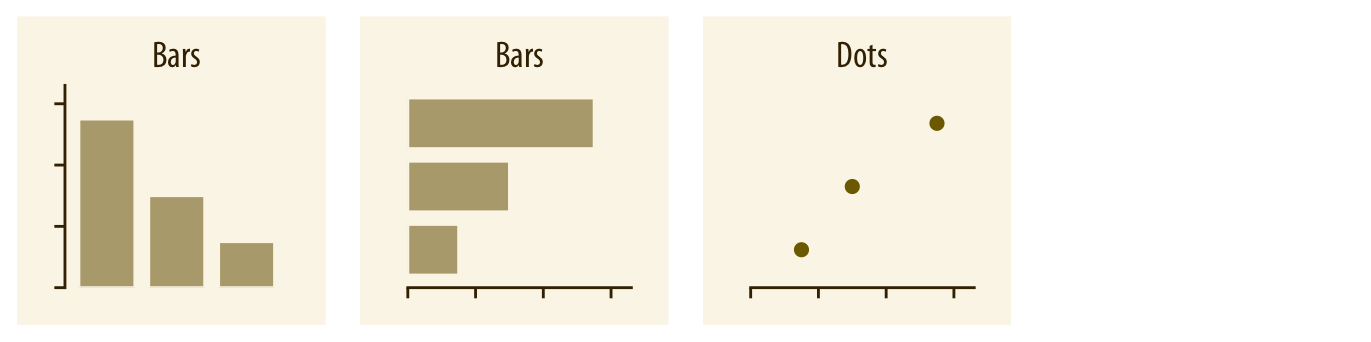

### Distribuições

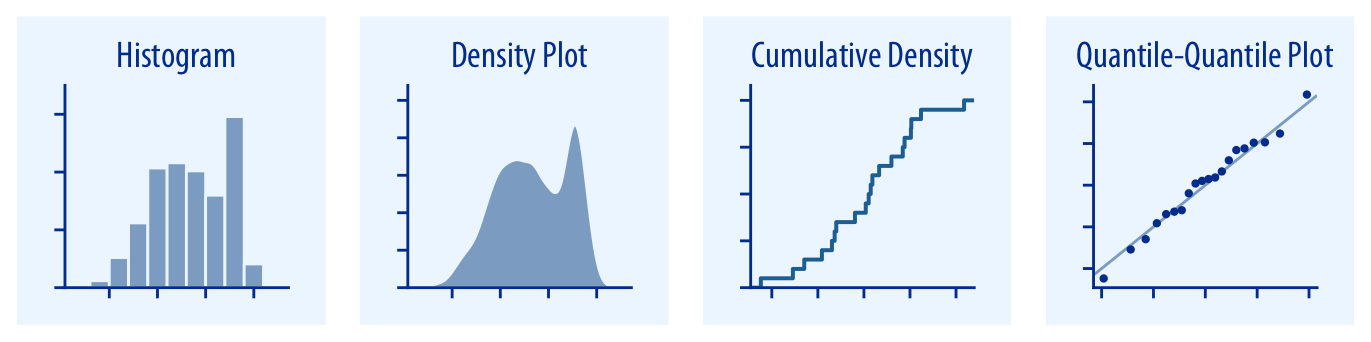

### Proporções

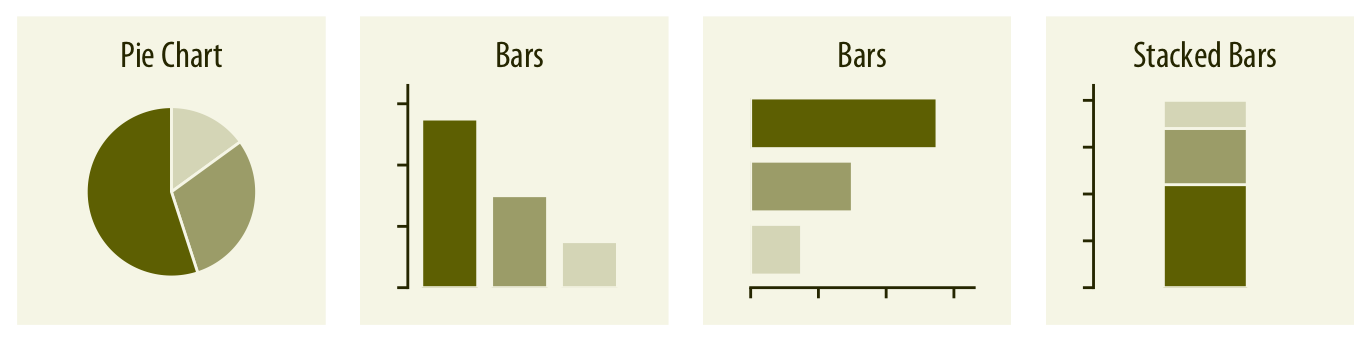
### Relacionamento (x-y)

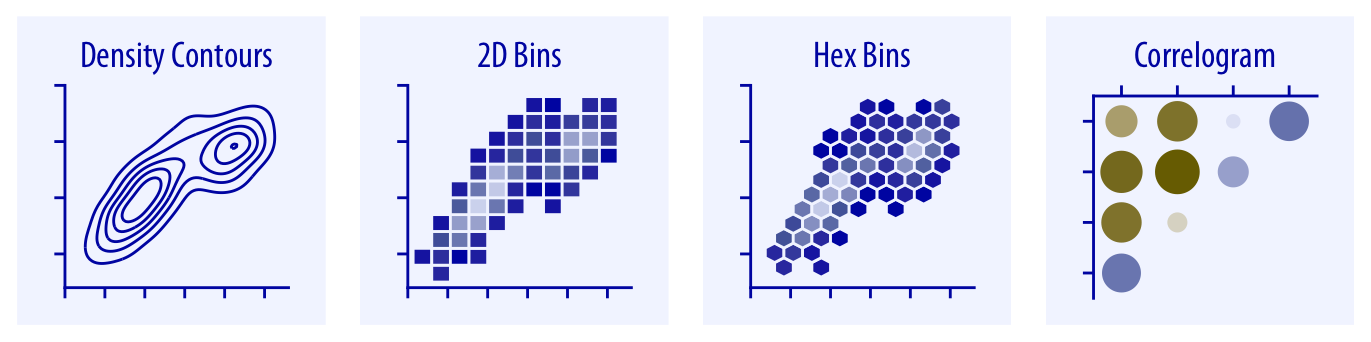

### Geoespacial

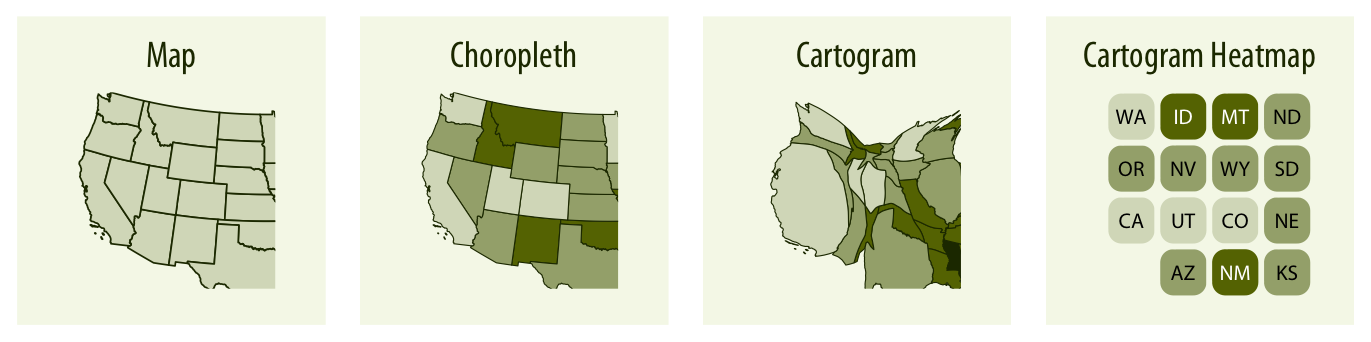

### Incerteza

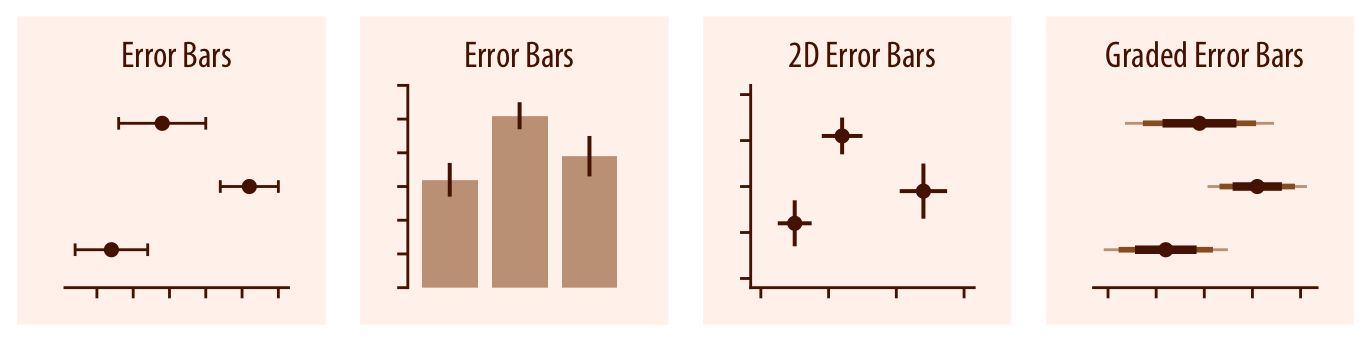


## Dados

Vamos utilizar como fonte de dados, um dataset dristribuído diretamente no Google Colab: `california_housing_data`.

- `longitude`: Uma medida de quanto à norte está a casa. Quanto maior o valor, mais à norte.

- `latitude`:	Uma medida de quanto ao oeste está a casa. Quanto maior o valor, mais ao oeste.

- `housingMedianAge`:	Idade mediana da casa, no mesmo quarteirão.	

- `totalRooms`:	Quantidade de cômodos no mesmo quarteirão.	

- `totalBedrooms`:	Quantidade de quartos no mesmo quarteirão.	

- `population`:	População residente no mesmo quarteirão.

- `households`:	Total de habitantes (um grupo de pessoas morando na mesma casa), por quarteirão.	

- `medianIncome`:	Renda mediana para os habitantes de um mesmo quarteirão, (medidos em dezenas de milhares de dólares).	

- `medianHouseValue`:	Valor mediano das casas no mesmo quarteirão (medido em dólares). **Usualmente, esse é o `target`.**

Referência: Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, Volume 33, Number 3, May 5 1997, p. 291-297.

https://developers.google.com/machine-learning/crash-course/california-housing-data-description


In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
california_housing = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
california_housing

Vamos traduzir o nome das colunas...

In [ ]:
california_housing.rename(columns={
    "housing_median_age": "idade_mediana", 
    "total_rooms": "total_de_comodos",
    "total_bedrooms": "total_de_quartos",
    "population": "populacao",
    "households": "residentes",
    "median_income": "renda_mediana",
    "median_house_value": "valor_mediano",
    }, inplace=True)

In [ ]:
california_housing.describe()

##### **Histogramas**

In [ ]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
variavel = 'idade_mediana'

ax.hist(california_housing[variavel], bins=10)

ax.grid(alpha=0.4)

ax.set_ylabel("Número de Entradas")
ax.set_xlabel(variavel);

Qual o número ideal de bins (divisões)?

##### **Distribuições Acumulativas**

In [ ]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
variavel = 'idade_mediana'

ax.hist(california_housing[variavel], bins=10, histtype='step' , cumulative=True, color='red')

# vários histogramas 
# valor_de_corte = 265000
# n, bins, _ = ax.hist(california_housing[california_housing['valor_mediano'] < valor_de_corte][variavel], bins=10, histtype='step' , cumulative=False, color='red', label='Valor Mediano baixo', log=True)
# ax.hist(california_housing[california_housing['valor_mediano'] > valor_de_corte][variavel], bins=bins, histtype='step' , cumulative=False, color='blue', label='Valor Mediano alto', log=True)

ax.grid(alpha=0.4)

plt.legend()

ax.set_ylabel("Número de Entradas")
ax.set_xlabel(variavel);




##### **Scatter Plots**

Gráficos de associação.

In [ ]:


fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

variavel_x = 'idade_mediana'
variavel_y = 'valor_mediano'


# variavel_x = 'valor_mediano'
# variavel_y = 'renda_mediana'

ax.scatter(california_housing[variavel_x], california_housing[variavel_y], c='tab:green', alpha=0.4, edgecolors='none')

ax.grid(alpha=0.4)

ax.set_xlabel(variavel_x)
ax.set_ylabel(variavel_y);





##### **Bubble Plots**

Gráficos de associação com escala.

In [ ]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

variavel_x = 'populacao'
variavel_y = 'total_de_comodos'

# ax.scatter(california_housing[variavel_x], california_housing[variavel_y], s=1000, c='tab:blue', alpha=0.4, edgecolors='none')

variavel_z = 'valor_mediano'
buffer = california_housing.sample(10000)
scale = 2000/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]

ax.scatter(buffer[variavel_x], buffer[variavel_y], s=scale, c='tab:blue', alpha=0.4, edgecolors='none')

ax.grid(alpha=0.4)


ax.set_xlabel(variavel_x)
ax.set_ylabel(variavel_y);


In [ ]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

variavel_x = 'populacao'
variavel_y = 'total_de_comodos'
variavel_z = 'valor_mediano'

buffer = california_housing.sample(100)
scale = 1000/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]

plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=scale, c=scale, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.grid(alpha=0.4)

ax.set_xlabel(variavel_x)
ax.set_ylabel(variavel_y);


##### **Geoespacial**

Explorando localização em um mapa.

California no Google Maps: https://goo.gl/maps/9YYGR8JCJexbpEBQ7

In [ ]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
variavel_x = 'longitude'
variavel_y = 'latitude'
variavel_z = 'valor_mediano'

buffer = california_housing
scale = 100/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]

plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=10, c=scale, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.grid(alpha=0.4)

ax.set_xlabel(variavel_x)
ax.set_ylabel(variavel_y);

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/USA_California_location_map.svg/1000px-USA_California_location_map.svg.png

In [ ]:
fig = plt.figure(figsize=(24,16)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

import matplotlib.image as mpimg
california_img=mpimg.imread('1000px-USA_California_location_map.svg.png')
shift = 0.3
ax.imshow(california_img, extent=[california_housing['longitude'].min()-shift, california_housing['longitude'].max()+shift, california_housing['latitude'].min()-shift, california_housing['latitude'].max()+shift], alpha=0.5)


variavel_x = 'longitude'
variavel_y = 'latitude'
variavel_z = 'valor_mediano'


buffer = california_housing
scale = 100/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]
plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=10, c=scale, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.set_ylabel(variavel_x)
ax.set_xlabel(variavel_y);

### Desafio

Faça um bubble plot no mapa da California, como o anterior, porém com o tamanho da bolha proporcional à população e com a cor proporcional ao valor médio dos imóveis.

In [ ]:
# coloque sua resposta aqui

#### Resposta

```python
fig = plt.figure(figsize=(24,16)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

import matplotlib.image as mpimg
california_img=mpimg.imread('1000px-USA_California_location_map.svg.png')
shift = 0.3
ax.imshow(california_img, extent=[california_housing['longitude'].min()-shift, california_housing['longitude'].max()+shift, california_housing['latitude'].min()-shift, california_housing['latitude'].max()+shift], alpha=0.5)


variavel_x = 'longitude'
variavel_y = 'latitude'
variavel_z = 'valor_mediano'


buffer = california_housing
scale_cor = 100/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]
scale_tamanho = 2000/(buffer['populacao'].max() - buffer['populacao'].min())*buffer['populacao']

plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=scale_tamanho, c=scale_cor, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.set_ylabel(variavel_x)
ax.set_xlabel(variavel_y);
```